# Real vs Fake News Detection

<b>Reference</b><br>
<ul>
<li><a>https://towardsdatascience.com/how-to-build-a-fake-news-detection-web-app-using-flask-c0cfd1d9c2d4</a></li>
<li><a>https://www.kaggle.com/code/alrafiaurnob/fake-and-real-news-classification-with-pytorch</a></li>
<li><a>https://www.geeksforgeeks.org/fake-news-detection-using-machine-learning/</a></li>
</ul>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from tqdm import tqdm
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud # conda install -c conda-forge wordcloud

In [3]:
# https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset/code?resource=download
df_fake = pd.read_csv('data/News/Fake.csv')
df_true = pd.read_csv('data/News/True.csv')

In [4]:
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [6]:
# add class or category to data frame
df_true['category']=1
df_fake['category']=0

In [7]:
df_fake.head()

,title,text,subject,date,category
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [8]:
df_true.head()

,title,text,subject,date,category
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [9]:
# If True, do not use the index values along the concatenation axis. 
# The resulting axis will be labeled 0, …, n - 1. 
# This is useful if you are concatenating objects where the 
# concatenation axis does not have meaningful indexing information.
df = pd.concat([df_true, df_fake], ignore_index=True)

In [10]:
df

,title,text,subject,date,category
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


## Exploratory Data Analysis

In [11]:
df.shape

(44898, 5)

In [12]:
# Check if there are any missing values in the dataset
df.isnull().sum()

title       0
text        0
subject     0
date        0
category    0
dtype: int64

In [13]:
df.dropna(axis=0, how='any', inplace=True)

In [14]:
# df.drop_duplicates(inplace=True)

In [15]:
# duplicateRows = df['text'].unique()
# duplicateRows.shape

In [16]:
df.subject.value_counts()

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

[Text(0, 0, 'politicsNews'),
 Text(1, 0, 'worldnews'),
 Text(2, 0, 'News'),
 Text(3, 0, 'politics'),
 Text(4, 0, 'Government News'),
 Text(5, 0, 'left-news'),
 Text(6, 0, 'US_News'),
 Text(7, 0, 'Middle-east')]

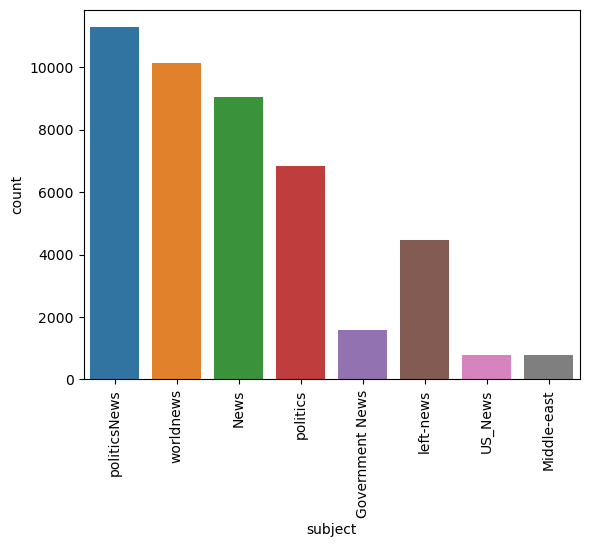

In [17]:
# sns.countplot(data=df, hue="category", x="subject")
chart=sns.countplot(x="subject",data=df)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)

In [18]:
# Remove title, subject and date
# df.drop(["title", "subject","date"], axis = 1, inplace=True)
# df_raw = df.drop(["title","subject", "date"], axis = 1)
df

,title,text,subject,date,category
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


<AxesSubplot: xlabel='category', ylabel='count'>

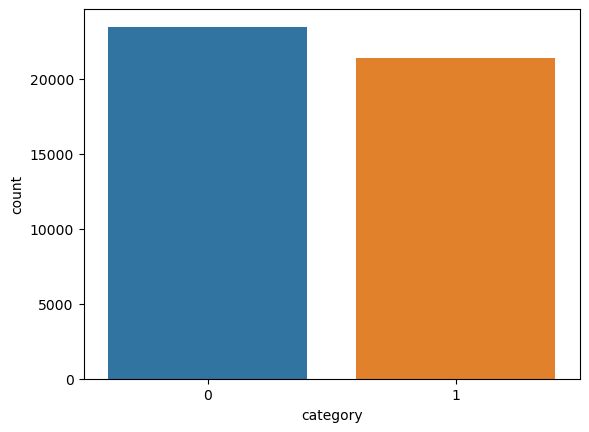

In [19]:
sns.countplot(data=df,
              x='category',
              order=df['category'].value_counts().index)

<function matplotlib.pyplot.show(close=None, block=None)>

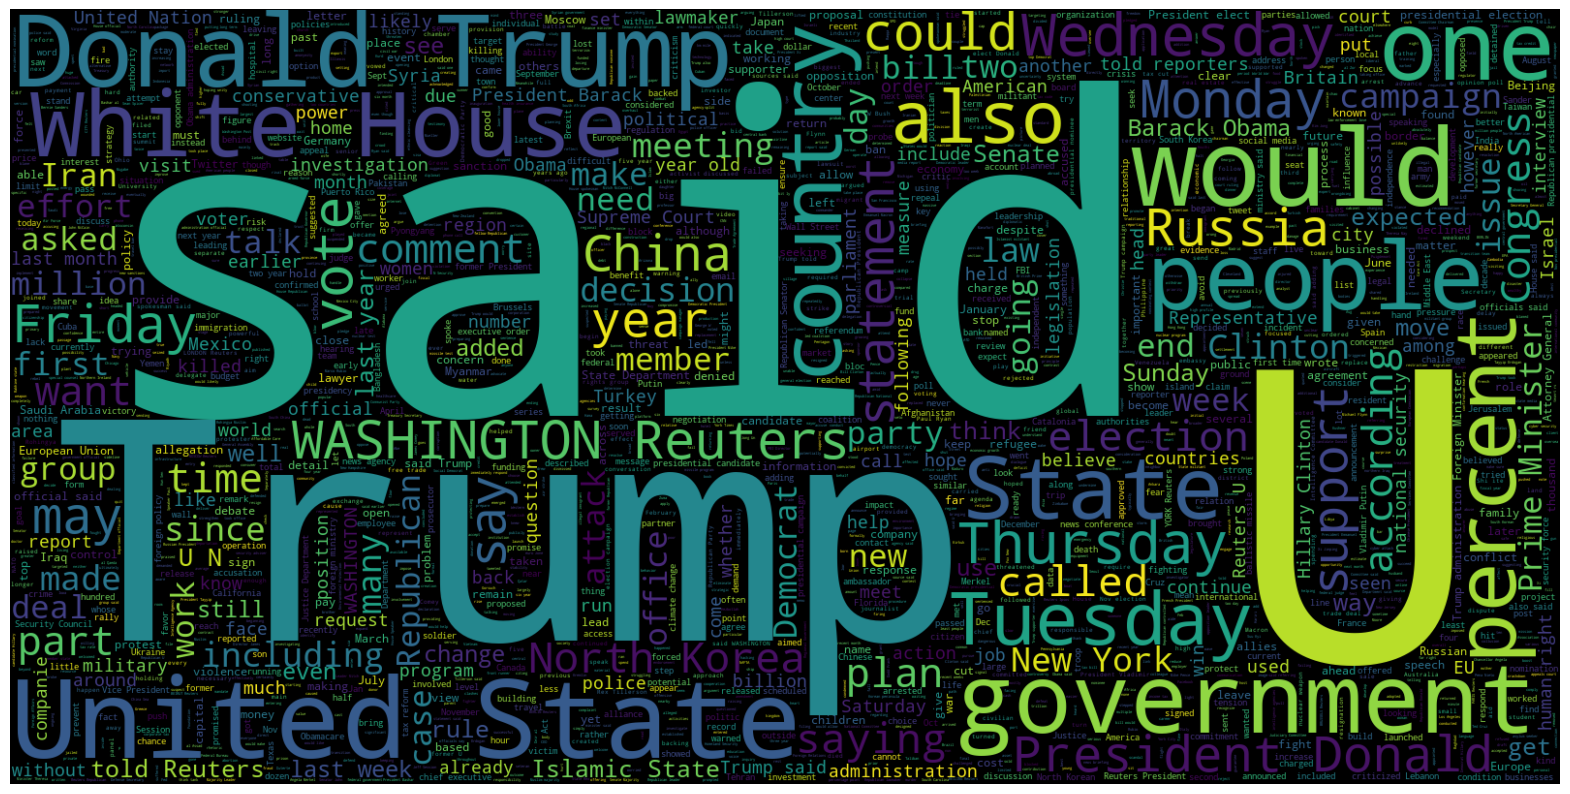

In [22]:
plt.figure(figsize = (20,20)) # Text from the real news articles
wc = WordCloud(max_words = 2000, width = 1600, height = 800, stopwords = stopwords.words('english')).generate(" ".join(df[df.category == 1].text))
plt.imshow(wc , interpolation = 'bilinear')
plt.axis('off')
plt.show

In [23]:
df.head()

,title,text,subject,date,category
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [24]:
# nltk.download('punkt')
# nltk.download('stopwords')

In [25]:
stopwords

<WordListCorpusReader in 'C:\\Users\\awln\\AppData\\Roaming\\nltk_data\\corpora\\stopwords'>

In [26]:
df

,title,text,subject,date,category
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


In [ ]:
# corpus = []
# for i in range(0, len(df)):
#     # replace each row of the dataframe that are not a-zA-Z with spaces
#     # Ref: https://stackoverflow.com/questions/2790813/regular-expression-a-za-z-or-a-za-z
#     review = re.sub('[^a-zA-Z]', ' ', df['text'][i])
#     # convert all to lower case letters
#     review = review.lower()
#     # split a string into a list where each word is a list item
#     review = review.split()
    
#     review = [snow_stemmer.stem(word) for word in review if not word in stopwords.words('english')]
#     review = ' '.join(review)
#     corpus.append(review)
    
# corpus

### Method 1

In [30]:
snow_stemmer = SnowballStemmer(language='english')
# english_stopwords = set(stopwords.words('english'))
english_stopwords = stopwords.words('english')

# https://www.geeksforgeeks.org/python-stemming-words-with-nltk/
def tokenize(text):
  return [snow_stemmer.stem(token) for token in word_tokenize(text)]

# Ref: https://www.etutorialspoint.com/index.php/386-tf-idf-tfidfvectorizer-tutorial-with-examples
vectorizer = TfidfVectorizer(
    lowercase=True,
    tokenizer=tokenize,
    stop_words=english_stopwords,
    max_features=1000
)

In [31]:
inputs = vectorizer.fit_transform(df.text)

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'s", 'abov', 'ani', 'becaus', 'befor', 'could', 'doe', 'dure', 'might', 'must', "n't", 'need', 'onc', 'onli', 'ourselv', 'sha', 'themselv', 'veri', 'whi', 'wo', 'would', 'yourselv'] not in stop_words.
  warnings.warn(


In [32]:
# vectorizer.fit(df.text)
print (vectorizer.get_feature_names_out())
print (vectorizer.idf_)
print (vectorizer.get_stop_words())
print (inputs.shape)

['!' '#' '$' '%' '&' '(' ')' '*' ',' '-' '.' '...' '1' '10' '11' '12' '15'
 '2' '20' '2012' '2014' '2015' '2016' '2017' '21st' '3' '30' '4' '5' '8'
 ':' ';' '?' '@' '[' ']' 'abl' 'abort' 'absolut' 'abus' 'accept' 'access'
 'accord' 'account' 'accus' 'across' 'act' 'action' 'activ' 'activist'
 'actual' 'ad' 'addit' 'address' 'administr' 'admit' 'advanc' 'advis'
 'affair' 'agenc' 'agenda' 'agent' 'ago' 'agre' 'agreement' 'ahead' 'aid'
 'aim' 'air' 'al' 'alleg' 'alli' 'allow' 'almost' 'along' 'alreadi' 'also'
 'although' 'alway' 'ambassador' 'amend' 'america' 'american' 'among'
 'ani' 'announc' 'anoth' 'answer' 'anyon' 'anyth' 'appar' 'appeal'
 'appear' 'appoint' 'approv' 'april' 'arabia' 'area' 'argu' 'arm' 'armi'
 'around' 'arrest' 'arriv' 'articl' 'ask' 'assault' 'assist' 'associ'
 'attack' 'attempt' 'attend' 'attorney' 'august' 'author' 'avoid' 'away'
 'back' 'bad' 'ban' 'bank' 'barack' 'base' 'becam' 'becaus' 'becom'
 'befor' 'began' 'begin' 'behind' 'believ' 'benefit' 'berni' 'best'

In [33]:
targets = df.category.values
targets.shape

(44898,)

In [34]:
# train_inputs,test_inputs,train_targets,test_targets=train_test_split(inputs,targets,shuffle=True,test_size=0.20,random_state=42)
# print (train_inputs.shape)
# print (test_inputs.shape)

# The X argument is an input array that contains the feature data (i.e., the variables/columns you want to 
# use to build your model.
# The y argument typically contains the vector of target values (i.e., the target or label of your data).
# This is typically a 1-dimensional Numpy array, although the function will allow 2D arrays and lists.
# The test_size parameter enables you to specify the size of the output test set.
# The random_state parameter controls how the pseudo-random number generator randomly selects observations to go into 
# the training set or test set.
# The shuffle parameter controls whether the input dataset is randomly shuffled before being split into train and test data.
# Ref: https://www.sharpsightlabs.com/blog/scikit-train_test_split/
(X_train, X_test, y_train, y_test) = train_test_split(inputs,targets,shuffle=True,test_size=0.20,random_state=42)
print (X_train.shape, X_test.shape)

(35918, 1000) (8980, 1000)


In [35]:
print (y_train.shape)
print (y_test.shape)

(35918,)
(8980,)


### Method 2

In [36]:
def do_makeCorpus(df, stop_words, stemmer):
    corpus = []
    for i in range(0, len(df)):
        # replace each row of the dataframe that are not a-zA-Z with spaces
        # Ref: https://stackoverflow.com/questions/2790813/regular-expression-a-za-z-or-a-za-z
        review = re.sub('[^a-zA-Z]', ' ', df['text'][i])
        # convert all to lower case letters
        review = review.lower()
        # split a string into a list where each word is a list item
        review = review.split()

        review = [stemmer.stem(word) for word in review if not word in stop_words]
        review = ' '.join(review)
        corpus.append(review)
        
    return corpus

In [37]:
corpus = do_makeCorpus(df, english_stopwords, snow_stemmer)

In [38]:
tfidf_v = TfidfVectorizer(max_features=5000, ngram_range=(1,3))
X = tfidf_v.fit_transform(corpus).toarray()
y = df['category']

In [39]:
(X_train_1, X_test_1, y_train_1, y_test_1) = train_test_split(X,y,shuffle=True,test_size=0.20,random_state=42)
print (X_train_1.shape, X_test_1.shape)

(35918, 5000) (8980, 5000)


## Modelling & Training - Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression
  
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [46]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# testing the model
print(accuracy_score(y_train, lr_model.predict(X_train)))
print(accuracy_score(y_test, lr_model.predict(X_test)))

0.9974386101676039
0.9969933184855234


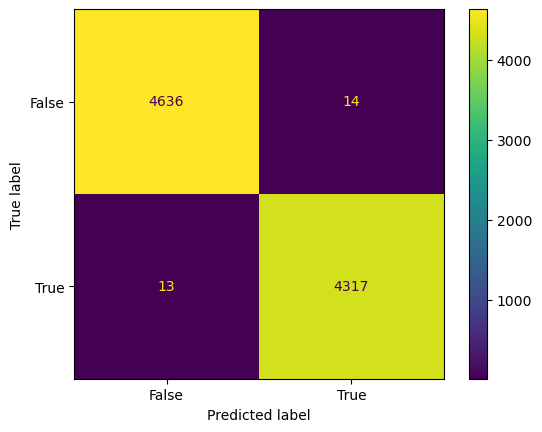

In [47]:
lr_cm = confusion_matrix(y_test, lr_model.predict(X_test))
  
lr_cm_display = ConfusionMatrixDisplay(confusion_matrix=lr_cm,
                                       display_labels=[False, True])
  
lr_cm_display.plot()
plt.show()

## Modelling & Training - Decision Tree Classifier

In [48]:
from sklearn.tree import DecisionTreeClassifier
  
dt_model = DecisionTreeClassifier()
# model.fit(train_inputs, train_targets)
dt_model.fit(X_train, y_train)
  
# testing the model
# print(accuracy_score(train_targets, model.predict(train_inputs)))
# print(accuracy_score(test_targets, model.predict(test_inputs)))
print(accuracy_score(y_train, dt_model.predict(X_train)))
print(accuracy_score(y_test, dt_model.predict(X_test)))

0.9999721588061696
1.0


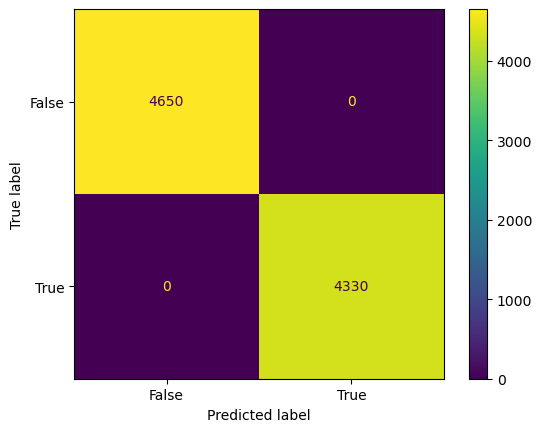

In [49]:
dt_cm = confusion_matrix(y_test, dt_model.predict(X_test))
  
dt_cm_display = ConfusionMatrixDisplay(confusion_matrix=dt_cm,
                                       display_labels=[False, True])
  
dt_cm_display.plot()
plt.show()

## Modelling & Training - Online Passive-Aggressive Algorithms
<a>https://jmlr.csail.mit.edu/papers/volume7/crammer06a/crammer06a.pdf</a>

In [50]:
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn import metrics
import numpy as np
import itertools

pa_model = PassiveAggressiveClassifier(max_iter=1000)
pa_model.fit(X_train_1, y_train_1)
train_pred = pa_model.predict(X_train_1)
test_pred = pa_model.predict(X_test_1)
print(accuracy_score(y_train_1, train_pred))
print(accuracy_score(y_test_1, test_pred))

0.9999721588061696
0.9943207126948775


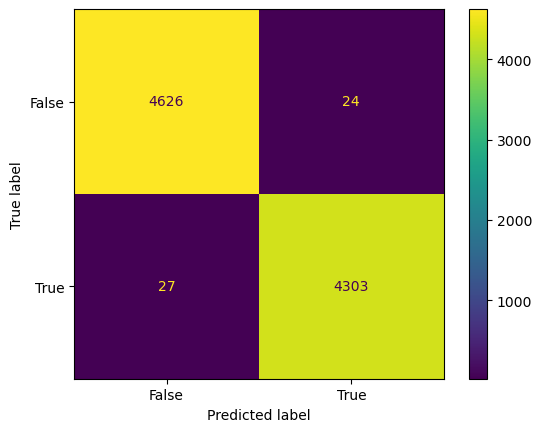

In [51]:
from sklearn import metrics
cm = confusion_matrix(y_test_1, pa_model.predict(X_test_1))
  
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,
                                            display_labels=[False, True])
  
cm_display.plot()
plt.show()

## Save Model and Vectorizer

In [ ]:
import pickle
pickle.dump(lr_model, open('lr_model.pkl', 'wb'))
pickle.dump(vectorizer, open('tfidfvect1.pkl', 'wb'))

In [ ]:
pickle.dump(lr_model, open('dt_model.pkl', 'wb'))
pickle.dump(pa_model, open('pa_model.pkl', 'wb'))
pickle.dump(tfidf_v, open('tfidfvect2.pkl', 'wb'))

In [ ]:
# Load model and vectorizer
joblib_lr_model = pickle.load(open('lr_model.pkl', 'rb'))
joblib_vect = pickle.load(open('tfidfvect2.pkl', 'rb'))

review = [""]
val_pkl = joblib_vect.transform([review]).toarray()
joblib_model.predict(val_pkl)

## Prediction

In [52]:
def do_predict(model, test_text, stop_words, stemmer, tfidfvect):
    # replace each row of the dataframe that are not a-zA-Z with spaces
    # Ref: https://stackoverflow.com/questions/2790813/regular-expression-a-za-z-or-a-za-z
    review = re.sub('[^a-zA-Z]', ' ', test_text)
    # convert all to lower case letters
    review = review.lower()
    # split a string into a list where each word is a list item
    review = review.split()
    
    review = [stemmer.stem(word) for word in review if not word in stop_words]
    
    # concat separate by a space
    review = ' '.join(review)
    
    # Transform documents to document-term matrix.
    review_vect = tfidfvect.transform([review]).toarray()
    
    prediction = 'FAKE' if model.predict(review_vect) == 0 else 'REAL'
    return prediction

## Loading models and vectorized files

In [54]:
import pickle

# Load model and vectorizer
joblib_lr_model = pickle.load(open('lr_model.pkl', 'rb'))
joblib_vect_1 = pickle.load(open('tfidfvect1.pkl', 'rb'))

In [55]:
# Load model
joblib_dt_model = pickle.load(open('dt_model.pkl', 'rb'))

In [56]:
# Load model and vectorizer
joblib_pa_model = pickle.load(open('pa_model.pkl', 'rb'))
joblib_vect_2 = pickle.load(open('tfidfvect2.pkl', 'rb'))

## Test Simple

In [57]:
test_fake_news = df_fake.iloc[13070,1]
print (test_fake_news)

review = re.sub('[^a-zA-Z]', ' ', test_fake_news)
print (review)

review = review.lower()
print (review)

review = review.split()
print (review)

review = [snow_stemmer.stem(word) for word in review if not word in english_stopwords]
print (review)

review = ' '.join(review)
print (review)

print ([review])

val = tfidf_v.transform([review]).toarray()
print ("Direct using model: ", pa_model.predict(val))

val_pkl = joblib_vect_2.transform([review]).toarray()
print ("Using saved model file: ", joblib_pa_model.predict(val_pkl))

 There are many  C  words for Hillary but  competent  is not one of them .OUCH! 
 There are many  C  words for Hillary but  competent  is not one of them  OUCH  
 there are many  c  words for hillary but  competent  is not one of them  ouch  
['there', 'are', 'many', 'c', 'words', 'for', 'hillary', 'but', 'competent', 'is', 'not', 'one', 'of', 'them', 'ouch']
['mani', 'c', 'word', 'hillari', 'compet', 'one', 'ouch']
mani c word hillari compet one ouch
['mani c word hillari compet one ouch']
Direct using model:  [0]
Using saved model file:  [0]


## Test Model using function

In [ ]:
# Load model and vectorizer
# joblib_model = pickle.load(open('lr_model.pkl', 'rb'))
# joblib_vect = pickle.load(open('tfidfvect2.pkl', 'rb'))
# val_pkl = joblib_vect.transform([review]).toarray()
# joblib_model.predict(val_pkl)

In [59]:
prediction = do_predict(joblib_lr_model, test_fake_news, english_stopwords, snow_stemmer, joblib_vect_1)
print (prediction)

FAKE


D:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'s", 'abov', 'ani', 'becaus', 'befor', 'could', 'doe', 'dure', 'might', 'must', "n't", 'need', 'onc', 'onli', 'ourselv', 'sha', 'themselv', 'veri', 'whi', 'wo', 'would', 'yourselv'] not in stop_words.
  warnings.warn(


In [60]:
prediction = do_predict(joblib_dt_model, test_fake_news, english_stopwords, snow_stemmer, joblib_vect_1)
print (prediction)

FAKE


In [61]:
prediction = do_predict(joblib_pa_model, test_fake_news, english_stopwords, snow_stemmer, joblib_vect_2)
print (prediction)

FAKE
